## Breast cancer detection using kernel SVM 


### part 1: Loading data 

In [44]:
import pandas as pd
import numpy 
import matplotlib.pyplot as plt
data_set = pd.read_csv("data.csv")
FEATURES = data_set.iloc[:, 2:]
LABELS = data_set.iloc[:, 1]

We seperated our data to 2 different DataFrames using pandas,<br> 
one only for our features (FEATURES) and the other for predictors (LABELS).

### part 2: extracting some information about the dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

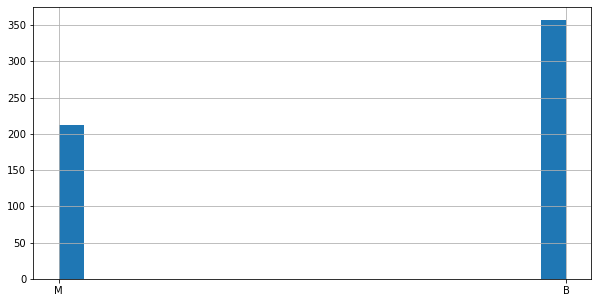

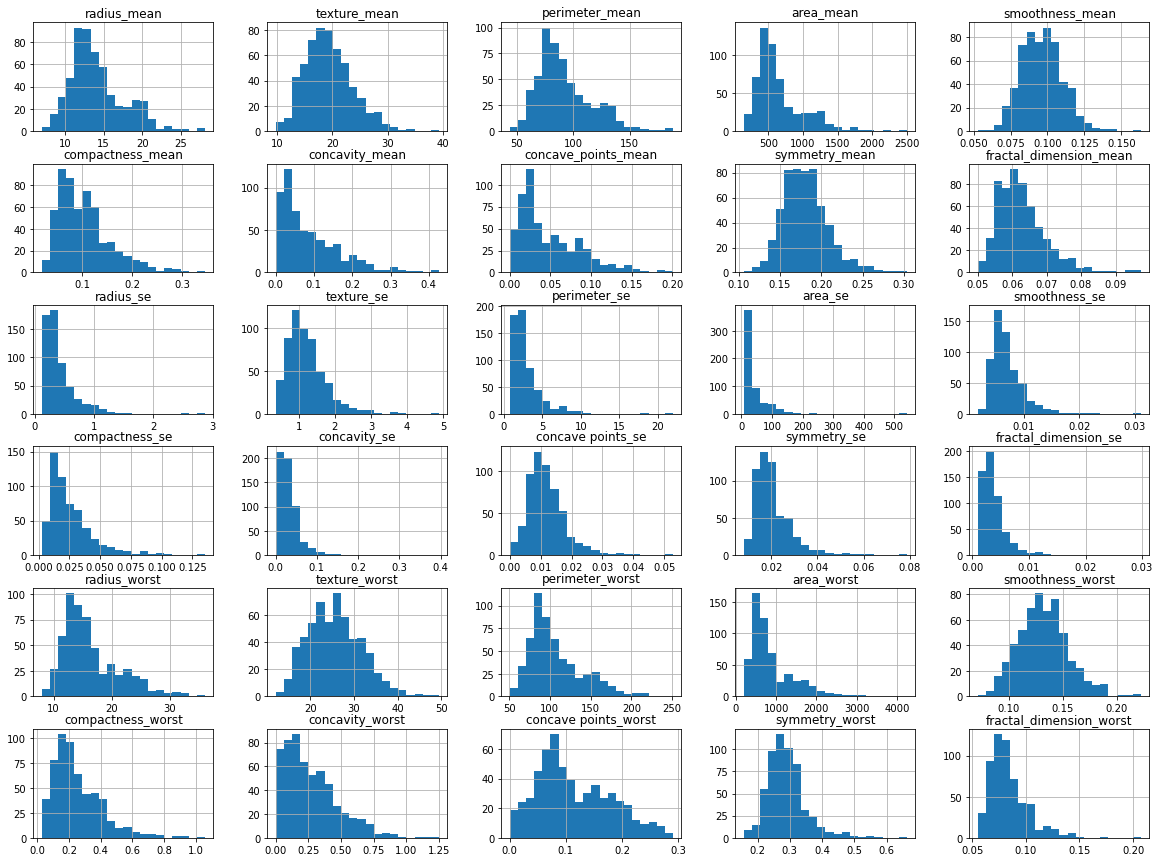

In [45]:
data_set.info() # checking for non-Null data and getting some information about our dataset 
LABELS.hist(bins = 20, figsize=(10,5))
FEATURES. hist(bins = 20, figsize=(20,15)) # checking the distribution of our features 
plt.show()

### part 3: Preprocessing our data 
As we can see we have only 2 predictors malignant 'M' and benign 'B', <br>
malignant tumors are cancerous while benign tumors aren't. <br>
Let's convert 'M' to integer 1 and 'B' to integer 0 for binary classification.

In [46]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# there are no missing values on our dataset 
# converting test labels to numerical values using sklearn
lb = preprocessing.LabelBinarizer()
tran = numpy.array(LABELS)
tran = lb.fit_transform(LABELS)
tran_dataframe = pd.DataFrame({'Column1': tran[:, 0]})
labels = numpy.array(tran_dataframe, dtype=int)
features = numpy.array(FEATURES)

# standaridization of the features 
scaler = StandardScaler().fit(features)
features_scaled = scaler.transform(features)

# train and test data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=1)

### part 4: Building our classifier and predicting 

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

classifier = SVC(kernel="poly", degree=3, coef0=1, C=1)
classifier.fit(X_train, numpy.ravel(y_train))


# testing model on new data x_test
y_pred = classifier.predict(X_test)
# checking the accuracy of the callisifier 
score = accuracy_score(y_test, y_pred)*100
print(f"The accuracy of the classifier is: {round(score,2)}%")

The accuracy of the classifier is: 96.49%
